# Data Wrangling

## Steps for data wrangling:
1. Gathering data (Kia)-libraries
2. Tools to clean data (Kis se clean) libraries
3. How to do, Kaisay (steps)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = sns.load_dataset('titanic')

In [98]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [99]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [101]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [102]:
df.drop(columns='deck', inplace=True)

In [103]:
# Missing values, replace missing values with mean
df['age'] = df.age.fillna(value = df['age'].mean())

In [104]:
df['embarked'] = df.embarked.fillna(value = df['embarked'].mode()[0])

In [105]:
df['embark_town'] = df.embark_town.fillna(value = df['embark_town'].mode()[0])

In [106]:
df.isnull().sum() / len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers Removal

## Visualization  Method

In [107]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='age'>

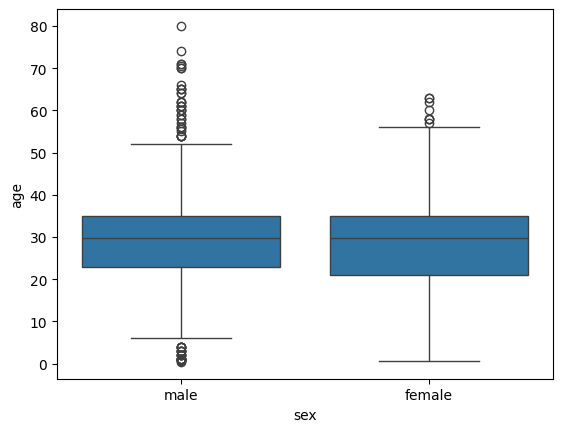

In [108]:
sns.boxplot(df, y='age', x='sex')

In [109]:
# IQR Method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age']>lower_bound) & (df['age']<upper_bound)]

In [110]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare']>lower_bound) & (df['fare']<upper_bound)]

In [111]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

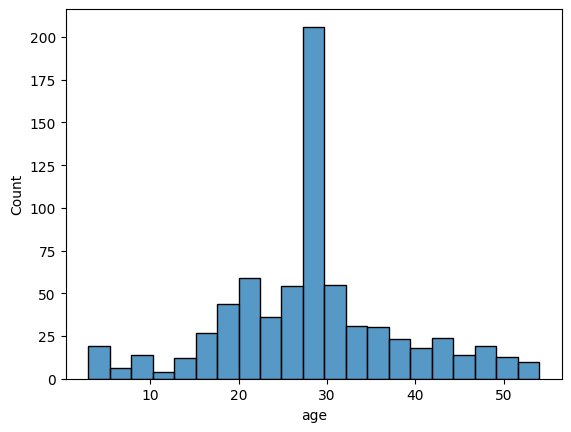

In [112]:
sns.histplot(df['age'])

In [113]:
# Z score method
# from scipy import stats
# import numpy as np

# zscore = np.abs(stats.zscore( df['age']))
# threshold = 3
# df = df[(z < threshold).all(axis=1)]

# Finding and dropping duplicates

In [114]:
df.shape


(718, 14)

In [115]:
# finding and dropping duplicates

# Finding duplicates
df.duplicated().sum()

103

In [116]:
# To find at which places duplicates lie / Whether its correct or not?
duplicates = df[df.duplicated()]
duplicates.shape

(103, 14)

In [117]:
duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [118]:
# Visualizing duplicates, (Not sure about this process because we are interested to remove two similar rows(duplicates))
# duplicates = df.duplicated()
# duplicates_count = duplicates.value_counts()

# plt.bar(duplicates_count.index, duplicates_count.values)
# plt.xlabel('duplicates')
# plt.ylabel('count')
# plt.show()

In [119]:
# Dropping duplicates (Dropping two similar rows)
df.drop_duplicates(inplace=True)

In [95]:
df.shape

(615, 14)

# Transformation
## Data Normalization (To bring data at one scale)


In [35]:
# There are several ways to normalize the data. An easy one is here;
# Install scikit learn library (Basic library for machine learning)
# pyhton -m pip install scikit-learn
#Two libraries will be used now for data normalization


In [154]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data
df

# Select columns to normalize
cols_to_normalize = ['age', 'fare']

#Create the scalar function/tool
scaler = MinMaxScaler()

#fit and transform the data on scaler or vice versa

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


#check data
df
    

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [41]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,0.499270,0.413649,0.317549,0.280114
std,0.472061,0.715818,0.196755,0.855001,0.784792,0.215782
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128538
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.191433
75%,1.000000,3.000000,0.585784,1.000000,0.000000,0.422426
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [42]:
#Mean and standard deviation are involved (-3,3)
import pandas as pd
from sklearn.preprocessing import StandardScaler

#data
df

# Select columns to normalize
cols_to_normalize = ['age', 'fare']

#Create the scalar function/tool
scaler = StandardScaler()

#fit and transform the data on scaler or vice versa

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


#check data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.644501,1,0,-0.751265,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.245599,0,0,-0.700265,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.651930,1,0,2.712961,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.651930,0,0,-0.690821,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123297,0,0,-0.659971,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.145874,0,0,-0.316820,S,Second,man,True,Southampton,no,True
887,1,1,female,-0.943677,0,0,0.967626,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123297,1,2,0.472736,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.245599,0,0,0.967626,C,First,man,True,Cherbourg,yes,True


# Log Transformation

In [134]:
kashti = sns.load_dataset('titanic')
kashti.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [129]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [130]:
# Now we will remove missig values (less outliers) plus performing log transformation
import numpy as np

kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())
# If the values are more close to the zero then 'log1p' is used.

#log transform

kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])

kashti.head()

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

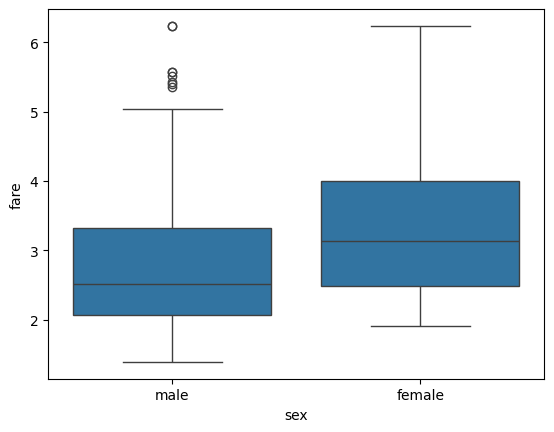

In [131]:
sns.boxplot(data=kashti, x='sex', y='fare')

<Axes: xlabel='sex', ylabel='age'>

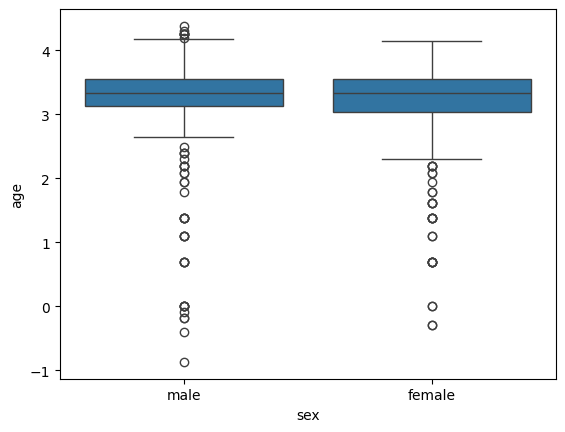

In [132]:
sns.boxplot(data=kashti, x='sex', y='age')

<Axes: xlabel='age', ylabel='Count'>

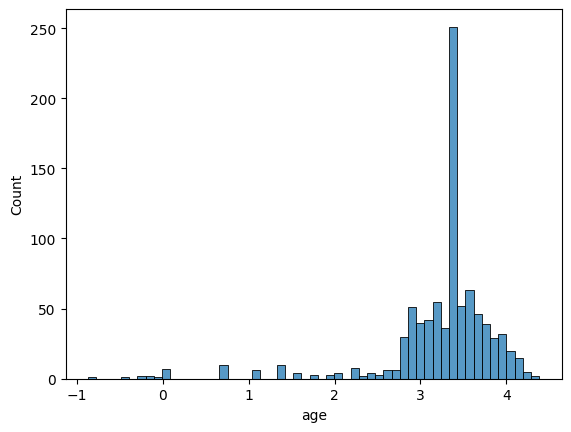

In [133]:
# Log 'age' graph
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

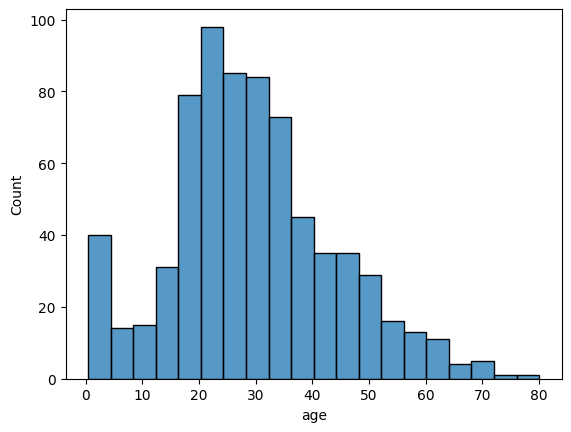

In [135]:
# Original 'age' value graph
sns.histplot(kashti['age'])

In [139]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Organizing the data

In [138]:
# Creating a new column (family size) by merging 'sibsp' and 'parch' columns

df['family_size'] = df['sibsp'] + df['parch']

<Axes: xlabel='family_size', ylabel='Count'>

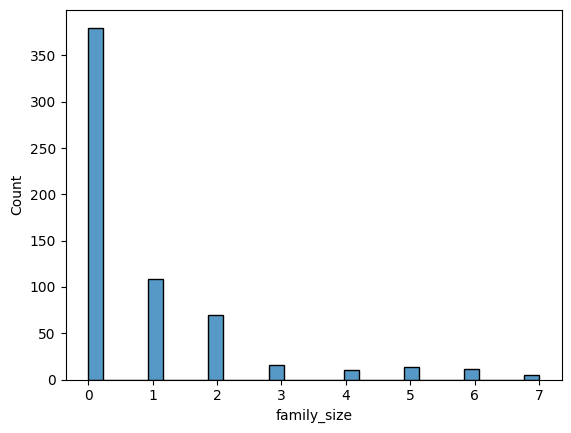

In [140]:
sns.histplot(df['family_size'])

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


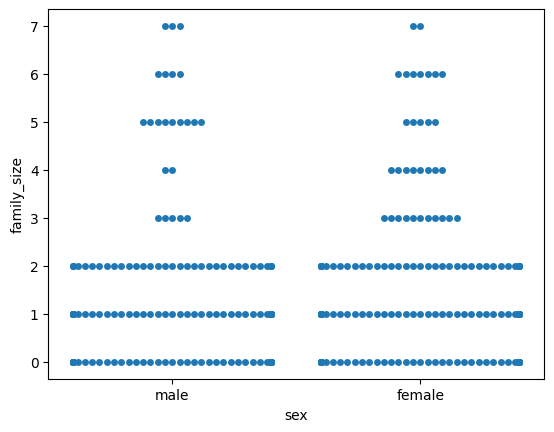

In [142]:
sns.swarmplot(data=df, x='sex', y='family_size')

<Axes: ylabel='family_size'>

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


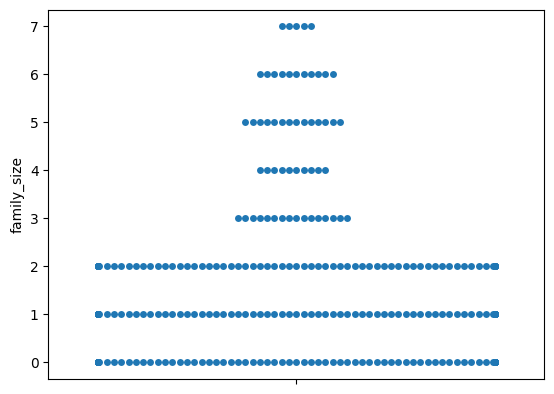

In [141]:
sns.swarmplot(df['family_size'])

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\IBM\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


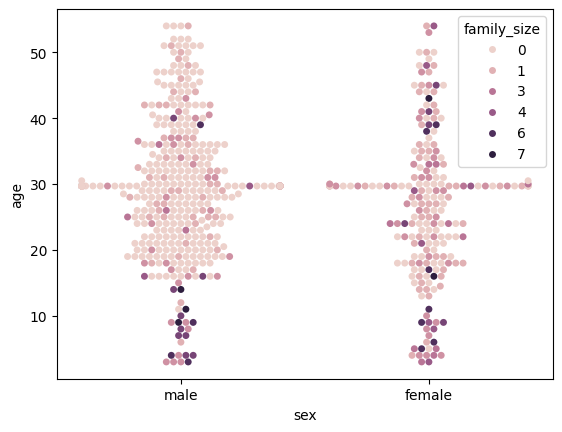

In [143]:
sns.swarmplot(data=df, x='sex', y='age', hue='family_size')

In [146]:
# Renaming a column
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [150]:
# To Summarize we organize using pivot table
# Pivot table is used to summarize and organize the data

table = pd.pivot_table(df, values='fare', index='pclass',
                       columns='survival', aggfunc=np.sum)
table


C:\Users\IBM\AppData\Local\Temp\ipykernel_2960\2167349328.py:4: FutureWarning: The provided callable <function sum at 0x0000022E8FD10860> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,1354.6707,2150.5295
2,1269.6458,1509.5917
3,3720.1580,1275.7375


<Axes: xlabel='fare', ylabel='age'>

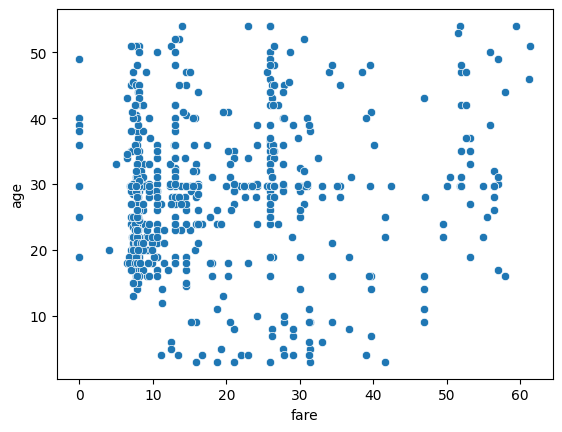

In [153]:
#$ To check the relation
sns.scatterplot(data=df, x='fare', y='age')

In [155]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


# Saving the wrangled data

In [156]:
df.to_csv('preprocesseddata.csv')